## INTRODUCTION
I visualized the World Happiness Report data on this kernel with seaborn.

In [8]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns #for data visualization
import matplotlib.pyplot as plt  #for data visualization

import warnings            
warnings.filterwarnings("ignore") 

from pandas.tools.plotting import parallel_coordinates

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("C:\Users\Ghost\Desktop\ML\archive"))

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (<ipython-input-8-18e967f404b7>, line 15)

In [10]:
data_2015=pd.read_csv('2015.csv')
data_2016=pd.read_csv('2016.csv')
data_2017=pd.read_csv('2017.csv')
#columns name change
data_2015.columns=[each.split()[0] if(len(each.split())>2) else each.replace(" ","_") for each in data_2015.columns]
data_2016.columns=[each.split()[0] if(len(each.split())>2) else each.replace(" ","_") for each in data_2016.columns]
data_2017.columns=[each.replace("."," ") for each in data_2017.columns]
data_2017.columns=[each.split()[0] if(len(each.split())>2) else each.replace(" ","_") for each in data_2017.columns]

In [11]:
data_2015.head()

,Country,Region,Happiness_Rank,Happiness_Score,Standard_Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia_Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [12]:
data_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            158 non-null    object 
 1   Region             158 non-null    object 
 2   Happiness_Rank     158 non-null    int64  
 3   Happiness_Score    158 non-null    float64
 4   Standard_Error     158 non-null    float64
 5   Economy            158 non-null    float64
 6   Family             158 non-null    float64
 7   Health             158 non-null    float64
 8   Freedom            158 non-null    float64
 9   Trust              158 non-null    float64
 10  Generosity         158 non-null    float64
 11  Dystopia_Residual  158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 14.9+ KB


In [14]:
print("Are There Missing Data? :", data_2015.isnull().any().any())
print(data_2015.isnull().sum())

Are There Missing Data? : False
Country              0
Region               0
Happiness_Rank       0
Happiness_Score      0
Standard_Error       0
Economy              0
Family               0
Health               0
Freedom              0
Trust                0
Generosity           0
Dystopia_Residual    0
dtype: int64


In [15]:
print("\n\nRegion in Dataset:\n")
print("There are {} different values\n".format(len(data_2015.Region.unique())))
print(data_2015.Region.unique())



Region in Dataset:

There are 10 different values

['Western Europe' 'North America' 'Australia and New Zealand'
 'Middle East and Northern Africa' 'Latin America and Caribbean'
 'Southeastern Asia' 'Central and Eastern Europe' 'Eastern Asia'
 'Sub-Saharan Africa' 'Southern Asia']


We found unique region names in our dataset and we calculated the happiness rate according to the regions and created a dataframe in descending order.

In [19]:
region_lists=list(data_2015['Region'].unique())
region_happiness_ratio=[]
for each in region_lists:
    region=data_2015[data_2015['Region']==each]
    region_happiness_rate=sum(region.Happiness_Score)/len(region)
    region_happiness_ratio.append(region_happiness_rate)
    
data=pd.DataFrame({'region':region_lists,'region_happiness_ratio':region_happiness_ratio})
new_index=(data['region_happiness_ratio'].sort_values(ascending=False)).index.values
sorted_data = data.reindex(new_index)

sorted_data

,region,region_happiness_ratio
2,Australia and New Zealand,7.285000
1,North America,7.273000
0,Western Europe,6.689619
4,Latin America and Caribbean,6.144682
7,Eastern Asia,5.626167
3,Middle East and Northern Africa,5.406900
6,Central and Eastern Europe,5.332931
5,Southeastern Asia,5.317444
9,Southern Asia,4.580857
8,Sub-Saharan Africa,4.202800


## Bar Plot
 What are the happiest regions of the world in 2015?
We have interpreted the answer of the question by visualizing it.

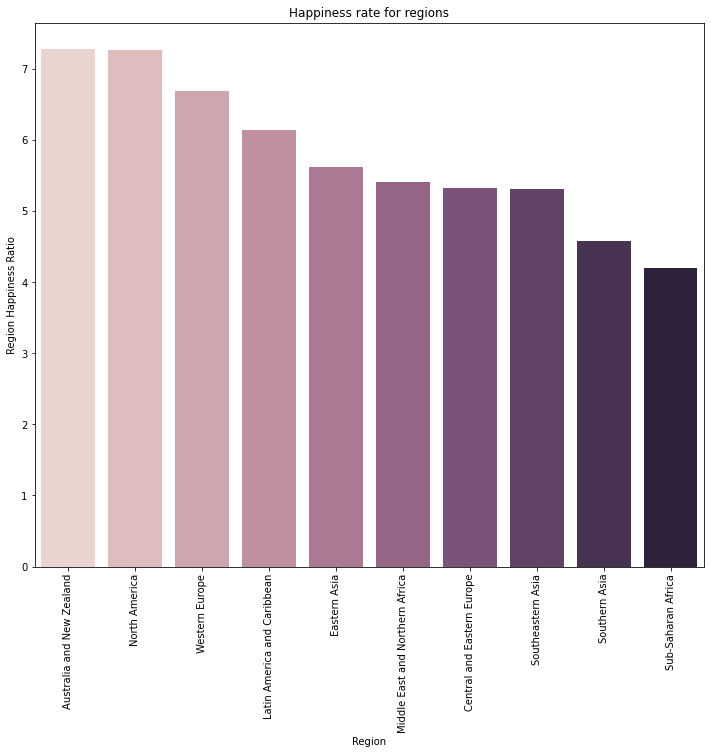

In [22]:
#Visualization
plt.figure(figsize=(12, 10))
sns.barplot(x=sorted_data['region'], y=sorted_data['region_happiness_ratio'],palette=sns.cubehelix_palette(len(sorted_data['region'])))
plt.xticks(rotation= 90)
plt.xlabel('Region')
plt.ylabel('Region Happiness Ratio')
plt.title('Happiness rate for regions')
plt.show()

In [24]:
region_lists=list(data_2015['Region'].unique())
region_economy_ratio=[]
for each in region_lists:
    region=data_2015[data_2015['Region']==each]
    region_economy_rate=sum(region.Economy)/len(region)
    region_economy_ratio.append(region_economy_rate)
    
data_economy=pd.DataFrame({'region':region_lists,'region_economy_ratio':region_economy_ratio})
new_index_economy=(data_economy['region_economy_ratio'].sort_values(ascending=True)).index.values
sorted_data_economy = data_economy.reindex(new_index_economy)
sorted_data_economy.head()

,region,region_economy_ratio
8,Sub-Saharan Africa,0.380473
9,Southern Asia,0.560486
5,Southeastern Asia,0.789054
4,Latin America and Caribbean,0.876815
6,Central and Eastern Europe,0.942438


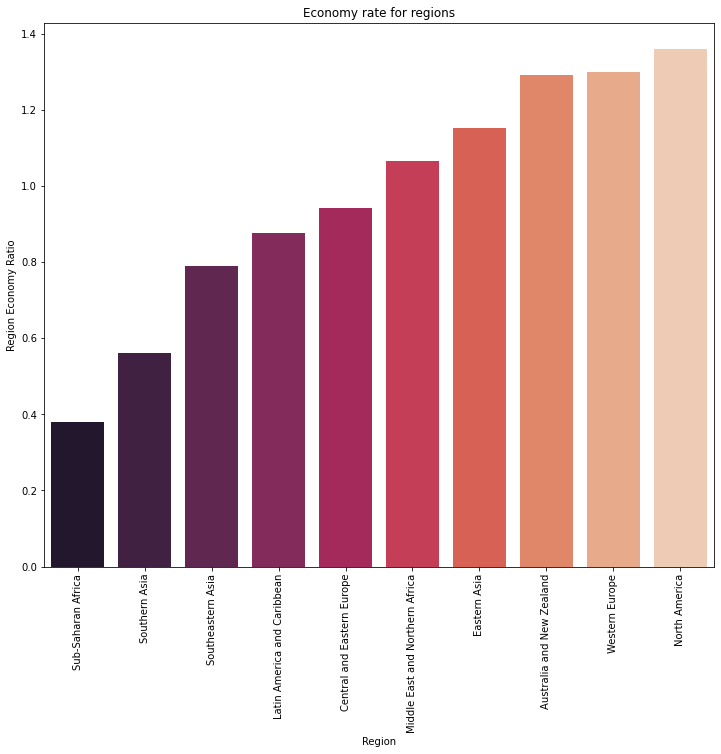

In [25]:
f,ax1 = plt.subplots(figsize =(12,10))
sns.barplot(x=sorted_data_economy['region'], y=sorted_data_economy['region_economy_ratio'],palette="rocket", ax=ax1)
# Place the region names at a 90-degree angle.
plt.xticks(rotation= 90)
plt.xlabel('Region')
plt.ylabel('Region Economy Ratio')
plt.title('Economy rate for regions')
plt.show()

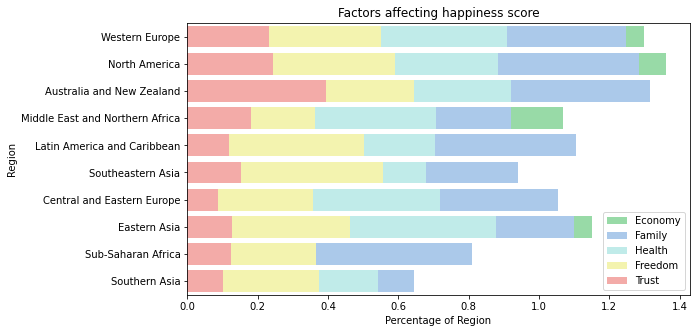

In [26]:
#Horizontal bar plot
region_lists=list(data_2015['Region'].unique())
share_economy=[]
share_family=[]
share_health=[]
share_freedom=[]
share_trust=[]
for each in region_lists:
    region=data_2015[data_2015['Region']==each]
    share_economy.append(sum(region.Economy)/len(region))
    share_family.append(sum(region.Family)/len(region))
    share_health.append(sum(region.Health)/len(region))
    share_freedom.append(sum(region.Freedom)/len(region))
    share_trust.append(sum(region.Trust)/len(region))
#Visualization
f,ax = plt.subplots(figsize = (9,5))
sns.set_color_codes("pastel")
sns.barplot(x=share_economy,y=region_lists,color='g',label="Economy")
sns.barplot(x=share_family,y=region_lists,color='b',label="Family")
sns.barplot(x=share_health,y=region_lists,color='c',label="Health")
sns.barplot(x=share_freedom,y=region_lists,color='y',label="Freedom")
sns.barplot(x=share_trust,y=region_lists,color='r',label="Trust")
ax.legend(loc="lower right",frameon = True)
ax.set(xlabel='Percentage of Region', ylabel='Region',title = "Factors affecting happiness score")
plt.show()

## Point Plot
The rate of happiness score and the rate of economy affecting happiness score

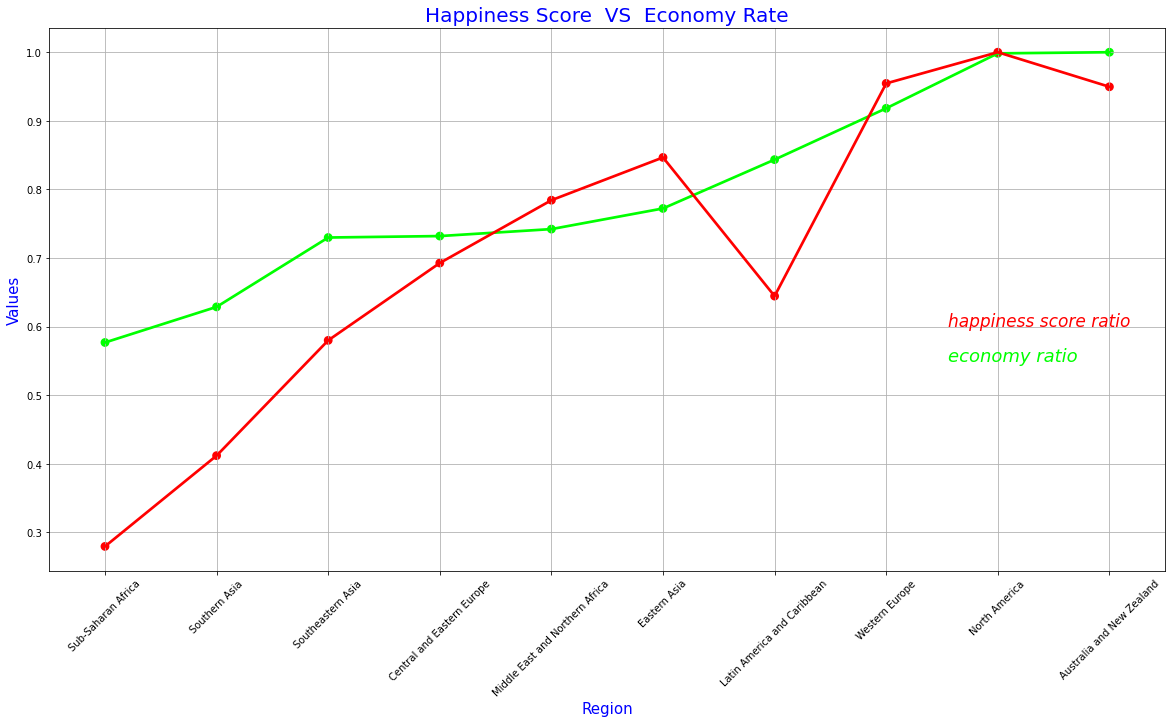

In [27]:
sorted_data['region_happiness_ratio']=sorted_data['region_happiness_ratio']/max(sorted_data['region_happiness_ratio'])
sorted_data_economy['region_economy_ratio']=sorted_data_economy['region_economy_ratio']/max(sorted_data_economy['region_economy_ratio'])

data=pd.concat([sorted_data,sorted_data_economy['region_economy_ratio']],axis=1)
data.sort_values('region_happiness_ratio',inplace=True)

#Visualization
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='region',y='region_happiness_ratio',data=data,color='lime',alpha=0.8)
sns.pointplot(x='region',y='region_economy_ratio',data=data,color='red',alpha=0.8)
plt.text(7.55,0.6,'happiness score ratio',color='red',fontsize = 17,style = 'italic')
plt.text(7.55,0.55,'economy ratio',color='lime',fontsize = 18,style = 'italic')
plt.xticks(rotation=45)
plt.xlabel('Region',fontsize = 15,color='blue')
plt.ylabel('Values',fontsize = 15,color='blue')
plt.title('Happiness Score  VS  Economy Rate',fontsize = 20,color='blue')
plt.grid()
plt.show()

## Joint Plot
Visualization of the percentage of happiness according to regions and the rate of family affecting it.
With the joint plot we can see the correlation between the two features.

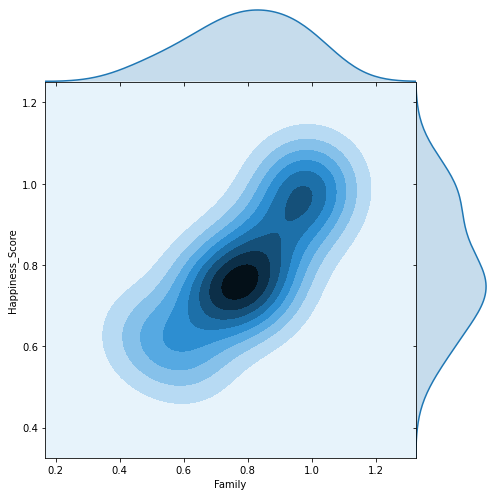

In [30]:
dataframe=pd.pivot_table(data_2015, index = 'Region', values=["Happiness_Score","Family"])
#to normalize
dataframe["Happiness_Score"]=dataframe["Happiness_Score"]/max(dataframe["Happiness_Score"])
dataframe["Family"]=dataframe["Family"]/max(dataframe["Family"])
sns.jointplot(dataframe.Family,dataframe.Happiness_Score,kind="kde",height=7,space=0)
plt.savefig('graph.png')
plt.show()

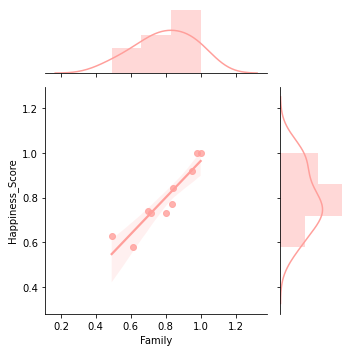

In [31]:
g= sns.jointplot("Family", "Happiness_Score", data=dataframe, height=5,kind= "reg", ratio=3, color="R")

## Pie Chart
According to the year we can visually see the percentage of happiness score.

In [32]:
data_2015['Year'] = 2015
data_2016['Year'] = 2016
data_2017['Year'] = 2017
data_concat= pd.concat([data_2015,data_2016,data_2017],axis=0,sort= False)
df = pd.pivot_table(data_concat, index = 'Year', values='Happiness_Score')
df

,Happiness_Score
Year,
2015,5.375734
2016,5.382185
2017,5.354019


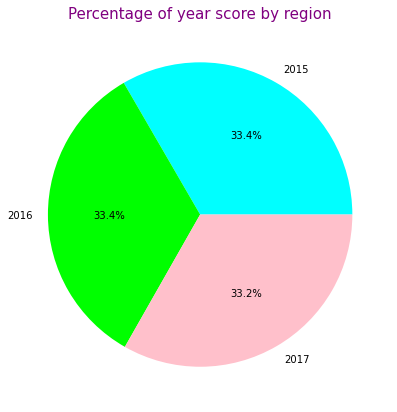

In [33]:
#pie chart
df.dropna(inplace = True)
labels =df.index
colors = ['cyan','lime','pink']
explode = [0,0,0]
sizes = df.values

# visual
plt.figure(figsize = (7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Percentage of year score by region',color = 'purple',fontsize = 15)
plt.show()

## Lm Plot
We used Lm Plot to see the results of a linear regression in data set.

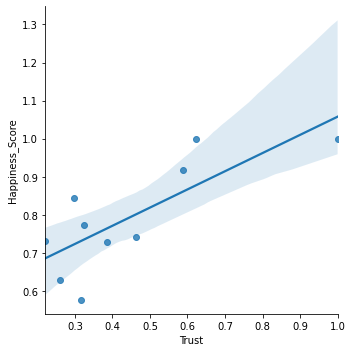

In [34]:
dataframe2=pd.pivot_table(data_2015, index = 'Region', values=["Happiness_Score","Trust"])
#to normalize
dataframe2["Happiness_Score"]=dataframe2["Happiness_Score"]/max(dataframe2["Happiness_Score"])
dataframe2["Trust"]=dataframe2["Trust"]/max(dataframe2["Trust"])
sns.lmplot("Trust","Happiness_Score",data=dataframe2)
plt.show()

## Kde Plot
visualization with the score of happiness according to years and the value of freedom affecting it.

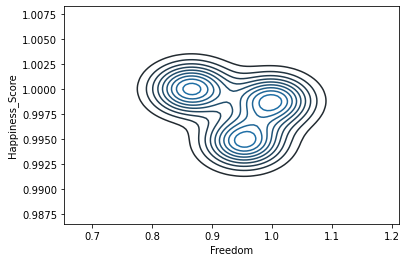

In [35]:
dataframe3=pd.pivot_table(data_concat, index = 'Year', values=["Happiness_Score","Freedom"])
#to normalize
dataframe3["Happiness_Score"]=dataframe3["Happiness_Score"]/max(dataframe3["Happiness_Score"])
dataframe3["Freedom"]=dataframe3["Freedom"]/max(dataframe3["Freedom"])
sns.kdeplot(dataframe3.Freedom,dataframe3.Happiness_Score,shade=False,cut=5)
plt.show()

## Violin Plot
The violin plot does not look at the correlation between the two features. It looks at the distribution of the values within the features.

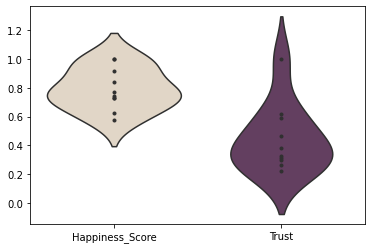

In [37]:
pal=sns.cubehelix_palette(2, rot=.5,dark=.3)
sns.violinplot(data=dataframe2, palette=pal, inner="points")
plt.show()

## Heatmap
We can visualize the correlation between HeatMap and the features in our dataset.

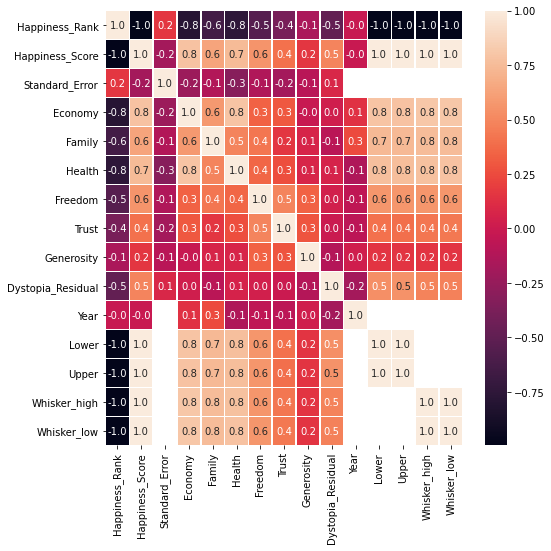

In [39]:
f,ax=plt.subplots(figsize=(8,8))
sns.heatmap(data_concat.corr(),annot=True, linewidth=.5, fmt='.1f', ax=ax)
plt.show()

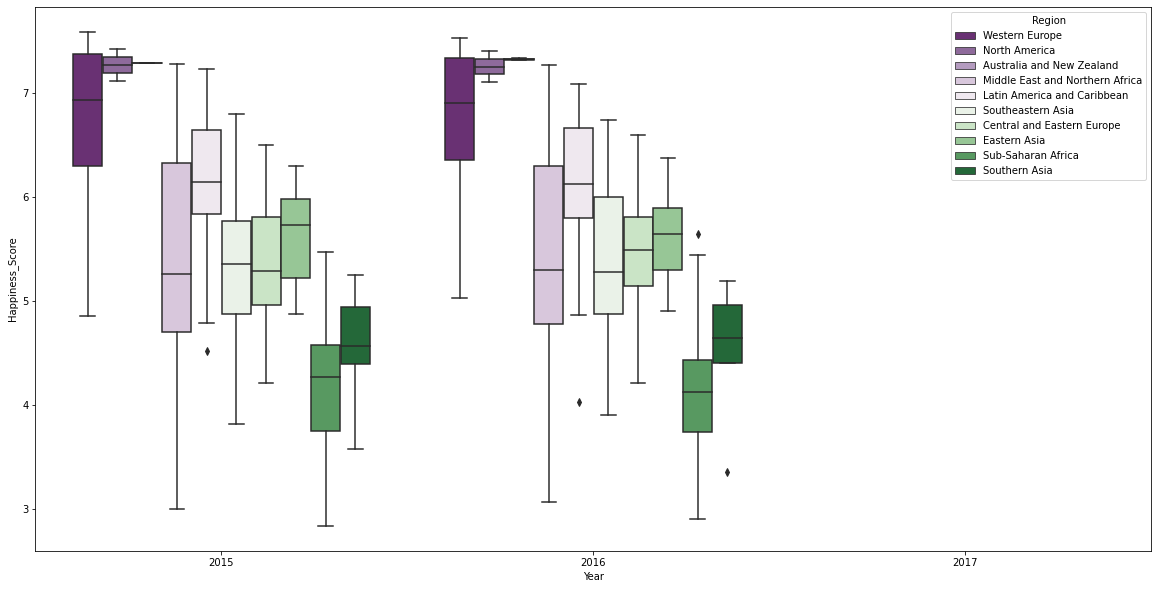

In [40]:
f, ax = plt.subplots(figsize=(20,10))
sns.boxplot(x="Year", y="Happiness_Score", hue="Region",data=data_concat, palette="PRGn",ax=ax)
plt.show()

## Swarm Plot
We can see the rate of happiness according to years by swarm plot.

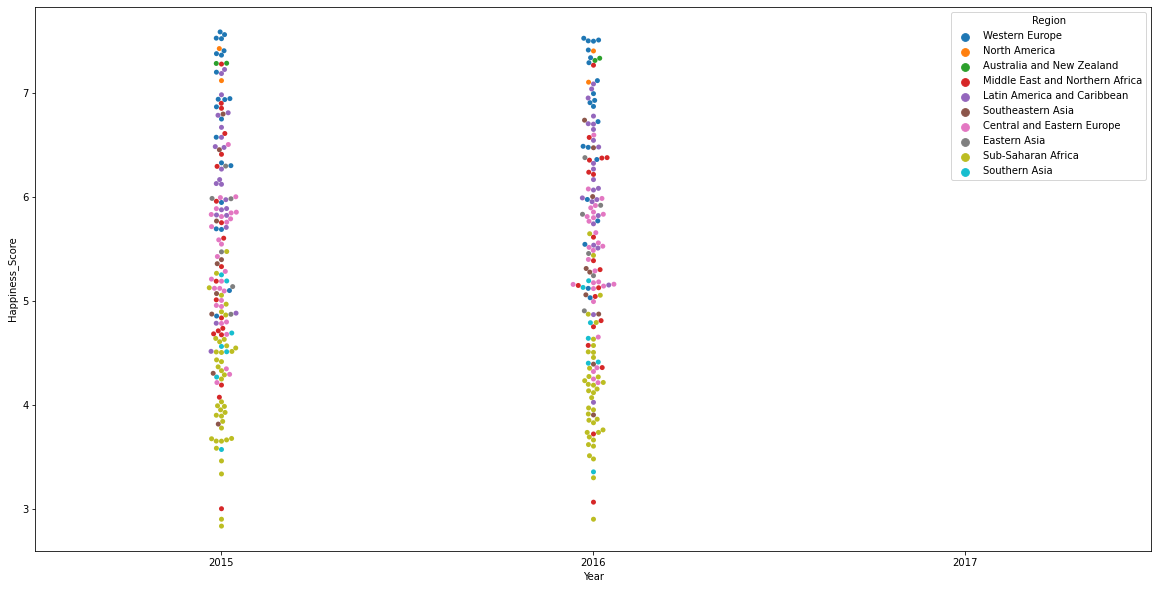

In [41]:
f,ax = plt.subplots(figsize = (20,10))
sns.swarmplot(x="Year", y="Happiness_Score", hue="Region",data=data_concat,ax=ax)
plt.show()

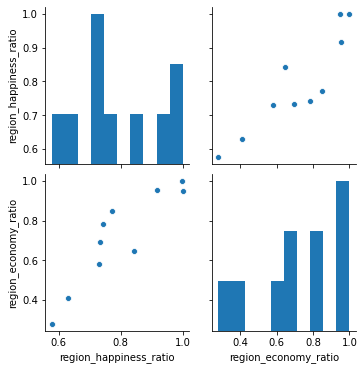

In [42]:
## Pair Plot
sns.pairplot(data)
plt.show()

## Count Plot
we fount the count numbers that the regions contain.

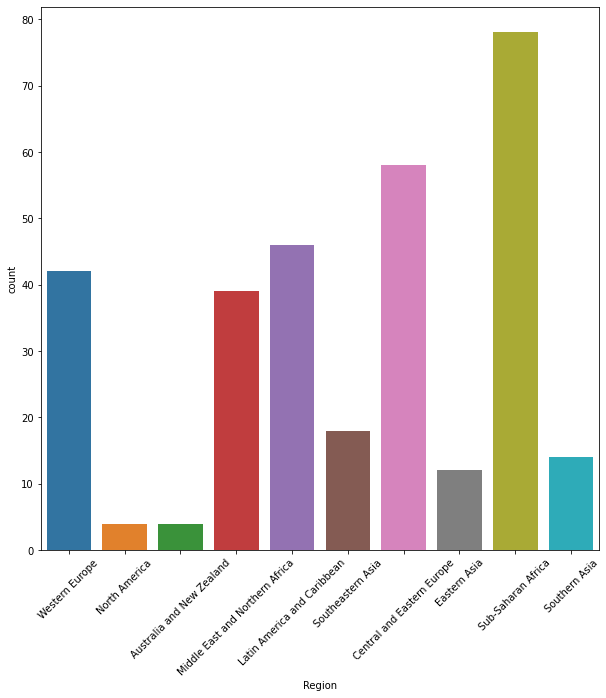

In [43]:
f, ax = plt.subplots(figsize=(10,10))
sns.countplot(data_concat.Region, ax=ax)
plt.xticks(rotation= 45)
plt.show()

## Rare Visualization
Parallel Plot Parallel plot allow to compare the feature of several individual observations on a set of numerical variables.

In [48]:
dataframe=data_concat.loc[:,["Year","Happiness_Score","Economy","Family","Health"]]
# Make the plot
plt.figure(figsize=(15,10))
parallel_coordinates(dataframe, 'Year', colormap=plt.get_cmap("Set1"))
plt.title(" visualization according to year features (2016, 2017, 2018)")
plt.xlabel("Features of data set")
plt.savefig('graph.png')
plt.show()

NameError: name 'parallel_coordinates' is not defined

<Figure size 1080x720 with 0 Axes>